In [17]:
import os
import sys
sys.path.append("..")
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
merge_which = "chymo_trypsin_2w"
merge_tab = f"/data2/yejb/prosit/figs/fig235/round1/{merge_which}/"

tab_before = f"/data2/yejb/prosit/figs/fig235/round1/{merge_which}/percolator/before"
tab_after = f"/data2/yejb/prosit/figs/fig235/round1/{merge_which}/percolator/after_0.1"

fake_ids = os.path.join(merge_tab, "fake_decoys.txt")

In [19]:
all_ids = pd.read_csv(fake_ids, sep='\t')
all_ids = all_ids[all_ids.columns[1]].to_list()
print(len(all_ids))

40000


In [20]:
data = pd.read_csv(os.path.join(
    f"/data2/yejb/prosit/figs/fig235/round1/{merge_which}", "fixed_features.tab"
), sep='\t')

data_ori = pd.read_csv(
    "/data2/yejb/prosit/figs/fig235/chymo/percolator_up/try/prosit_l1/no_finetuned_3fold/sa.tab", 
    sep='\t')

In [21]:
merge_set = set(data['Peptide'])
ori_set = set(data_ori['Peptide'])

In [22]:
print(
    len(set(data_ori[data_ori['Label'] == -1]['Peptide'])),
    len(set(data_ori[data_ori['Label'] == 1]['Peptide'])),
    len(set(data_ori[data_ori['Label'] == 1]['Peptide']).intersection(set(data_ori[data_ori['Label'] == -1]['Peptide'])))
)

set_all_ids = set(all_ids)
fake_index = data['SpecId'].apply(lambda x: x in set_all_ids)
print(
    fake_index.sum(),
    len(set(data[fake_index]['Peptide'])),
    len(set(data[data['Label'] == -1]['Peptide'])),
    len(set(data[data['Label'] == -1]['Peptide']).intersection(set(data[fake_index]['Peptide']))),
    len(set(data[data['Label'] == 1]['Peptide'])),
    len(set(data[data['Label'] == 1]['Peptide']).intersection(set(data[fake_index]['Peptide']))),
    len(set(data_ori[data_ori['Label'] == 1]['Peptide']).intersection(set(data[fake_index]['Peptide'])))
)

267956 401306 0
40000 37435 287209 19253 420565 19259 0


In [23]:
set_true_decoy = set(data[data['Label'] == -1]['Peptide']).intersection(set(data[fake_index]['Peptide']))
set_false_target = set(data[data['Label'] == 1]['Peptide']).intersection(set(data[fake_index]['Peptide']))

In [24]:
len(set_true_decoy.intersection(set_false_target))

1077

In [25]:
name = "prosit_combined"
before_sa = pd.read_csv(os.path.join(
    tab_before,
    f"{name}_target.psms"
), sep='\t')

after_sa = pd.read_csv(os.path.join(
    tab_after,
    f"{name}_target.psms"
), sep='\t')

psmid1 = set(before_sa["PSMId"].to_list())
psmid2 = set(after_sa["PSMId"].to_list())
left_target = []
for a in all_ids:
    if a in psmid1 and a in psmid2:
        left_target.append(a)
print(len(left_target))
left_target = set(left_target)

19994


In [26]:
print(min(all_ids), before_sa['PSMId'].max(), after_sa['PSMId'].max())


990553 1751862 1751862


In [27]:
all_ids = set(all_ids)
before_fdr = before_sa[before_sa['PSMId'].apply(lambda x: x in all_ids)]['q-value'].to_numpy()
after_fdr = after_sa[after_sa['PSMId'].apply(lambda x: x in all_ids)]['q-value'].to_numpy()


print(len(before_fdr), len(after_fdr))

19994 19995


In [28]:
fdr = 0.1
print((before_fdr < fdr).sum()/(before_sa['q-value']< fdr).sum(),
      (after_fdr < fdr).sum()/(after_sa['q-value']< fdr).sum())

0.004585464613486898 0.0035538924526807634


In [29]:
fdr = 0.1
print((before_fdr < fdr).sum(),
      (before_sa['q-value']< fdr).sum(),
      (after_fdr < fdr).sum(),
      (after_sa['q-value']< fdr).sum())

1368 298334 1077 303048


In [30]:
len(before_fdr)

19994

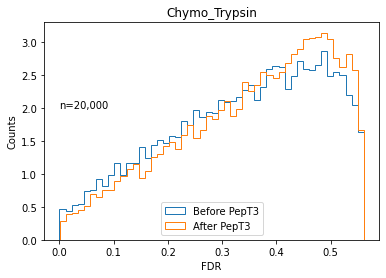

In [31]:
see = plt.hist(before_fdr, bins=50, density=True, histtype='step', label="Before PepT3")
see = plt.hist(after_fdr, bins=50, density=True, histtype='step', label="After PepT3")
plt.title("Chymo_Trypsin")
plt.text(0, 2, "n=20,000")
plt.xlabel("FDR")
plt.ylabel("Counts")
plt.legend(loc='lower center')
plt.savefig(f"./fig/entrapment-{len(before_fdr)}.svg", dpi=300, bbox_inches="tight")

507711